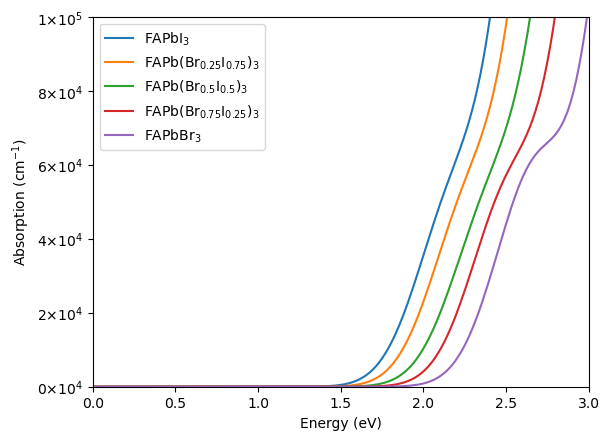

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

materials = {
    "FAPbI$_3$": {
        "dir" : 2.116, 
        "indir" :2.116, 
        "folder": "./Br0I12/",
    },
    #"Br1I11": {
    #    "dir": 2.152,
    #    "indir": 2.152,
    #    "folder": "./Br1I11/",
    #},
    #"Br2I10": {
    #    "dir": 2.175,
    #    "indir": 2.175, 
    #    "folder": "./Br2I10/",
    #},
    "FAPb(Br$_{0.25}$I$_{0.75}$)$_3$": {
        "dir": 2.200, 
        "indir": 2.200,
        "folder": "./Br3I9/",
    },
    #"Br4I8": {
    #    "dir": 2.277,
    #    "indir": 2.277,
    #    "folder": "./Br4I8/",
    #},
    #"Br5I7": {
    #    "dir": 2.246,
    #    "indir": 2.246,
    #    "folder": "./Br5I7/",
    #},
    "FAPb(Br$_{0.5}$I$_{0.5}$)$_3$": {
        "dir": 2.286,
        "indir": 2.286,
        "folder": "./Br6I6/",
    },
    #"Br7I5": {
    #    "dir": 2.350,
    #    "indir": 2.350,
    #    "folder": "./Br7I5/",
    #},
    #"Br8I4": {
    #    "dir": 2.383,
    #    "indir": 2.383,
    #    "folder": "./Br8I4/",
    #},
    "FAPb(Br$_{0.75}$I$_{0.25}$)$_3$": {
        "dir": 2.422,
        "indir": 2.422,
        "folder": "./Br9I3/",
    },
    #"Br10I2": {
    #    "dir": 2.472,
    #    "indir": 2.472,
    #    "folder": "./Br10I2/",
    #},
    #"Br11I1": {
    #    "dir": 2.531,
    #    "indir": 2.531,
    #    "folder": "./Br11I1/",
    #},
    "FAPbBr$_3$": {
        "dir": 2.587,
        "indir": 2.587,
        "folder": "./Br12I0/",
    },
}

fig, ax = plt.subplots()

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    ax.plot(energy, alpha_cm, label=material)
    
    
ax.set(xlim=[0,3],ylim = [0,1e5], xlabel='Energy (eV)', ylabel='Absorption (cm$^{-1}$)')
plt.legend()

# Custom formatter function to display labels as multiples of 10^4
def custom_formatter(x, pos):
    if x == 100000:
        return '1×10$^{5}$'  # Specific format for 100,000
    return f'{int(x/10000)}×10$^{4}$'

ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

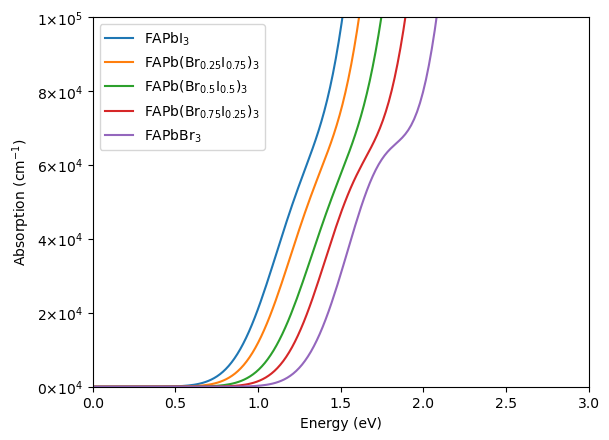

In [46]:
fig, ax = plt.subplots()

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    ediff = energy[1] - energy[0] #foot length of energy
    soc_correction = 0.9
    shiftnum = round(soc_correction / ediff)
    alpha_cm = alpha_cm[shiftnum:]
    energy = energy[:-shiftnum]
    ax.plot(energy, alpha_cm, label=material)

ax.set(xlim=[0,3],ylim = [0,1e5], xlabel='Energy (eV)', ylabel='Absorption (cm$^{-1}$)')
plt.legend()

# Custom formatter function to display labels as multiples of 10^4
def custom_formatter(x, pos):
    if x == 100000:
        return '1×10$^{5}$'  # Specific format for 100,000
    return f'{int(x/10000)}×10$^{4}$'

ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))